In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv(r'/Users/joaopinto/projects/Capstone-LDSA/data/two-years-recid.csv')
df.head()

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_charge_degree,c_charge_desc,juv_fel_count,juv_misd_count,juv_other_count,priors_count,compas_screening_date,type_of_assessment,decile_score,score_text,v_type_of_assessment,v_decile_score,v_score_text,is_recid,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaN,F,False Imprisonment,0,0,0,0,2013-01-05,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaN,M,Battery,0,0,0,1,2013-04-03,Risk of Recidivism,3,Low,Risk of Violence,3,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,NaN,M,DUI Level 0.15 Or Minor In Veh,0,0,0,8,2014-10-31,Risk of Recidivism,4,Low,Risk of Violence,2,Low,1,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,2014-01-23,F,arrest case no charge,0,1,0,1,2014-01-23,Risk of Recidivism,10,High,Risk of Violence,10,High,1,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaN,M,Battery,0,0,0,0,2013-12-09,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [3]:
df['v_type_of_assessment'].value_counts().head(10)

Risk of Violence    6114
Name: v_type_of_assessment, dtype: int64

In [4]:
df.isna().sum()

id                          0
name                        0
sex                         0
dob                         0
age                         0
race                        0
c_jail_in                 260
c_jail_out                260
c_case_number              18
c_offense_date            959
c_arrest_date            5173
c_charge_degree             0
c_charge_desc              24
juv_fel_count               0
juv_misd_count              0
juv_other_count             0
priors_count                0
compas_screening_date       0
type_of_assessment          0
decile_score                0
score_text                  0
v_type_of_assessment        0
v_decile_score              0
v_score_text                0
is_recid                    0
r_case_number            3183
r_offense_date           3183
r_charge_degree          3183
r_charge_desc            3232
is_violent_recid            0
vr_case_number           5420
vr_offense_date          5420
vr_charge_degree         5420
vr_charge_

In [42]:
grouped

,id,is_recid,percentage
race,,,
African-American,3121,1708,54.726049
Asian,26,11,42.307692
Caucasian,2083,874,41.958713
Hispanic,546,211,38.644689
Native American,13,7,53.846154
Other,325,120,36.923077


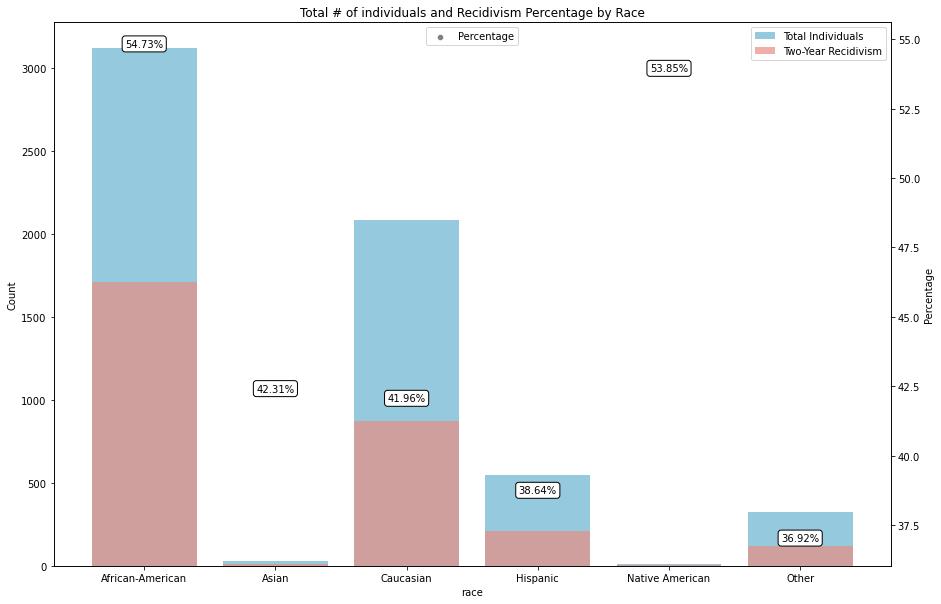

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant data

# Group by 'race' and calculate the necessary statistics
grouped = df.groupby('race').agg({'id': 'count', 'is_recid': 'sum'})
grouped['percentage'] = (grouped['is_recid'] / grouped['id']) * 100

# Create the main plot
plt.figure(figsize=(15, 10))
bar1 = sns.barplot(data=grouped, x=grouped.index, y='id', color='skyblue', label='Total Individuals')
bar2 = sns.barplot(data=grouped, x=grouped.index, y='is_recid', color='salmon', label='Two-Year Recidivism', alpha=0.7)

# Create a secondary axis for the percentage
ax2 = plt.twinx()
scatter = sns.scatterplot(data=grouped, x=grouped.index, y='percentage', color='gray', ax=ax2, label='Percentage')

# Add text annotations for percentages
for index, row in grouped.iterrows():
    ax2.text(index, row['percentage'], f"{row['percentage']:.2f}%", color='black', ha="center", 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Set labels and titles
bar1.set_title('Total # of individuals and Recidivism Percentage by Race')
bar1.set_ylabel('Count')
ax2.set_ylabel('Percentage')

# Combine legends from both axes
handles1, labels1 = bar1.get_legend_handles_labels()
handles2, labels2 = scatter.get_legend_handles_labels()

# Display the legend with specific placement for the percentage
legend = bar1.legend(handles=handles1, labels=labels1, loc='upper right')
ax2.legend(handles=handles2, labels=labels2, loc='upper center')

# Display the plot
plt.show()


In [6]:
df.describe().round(2)

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,v_decile_score,is_recid,is_violent_recid,two_year_recid
count,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00
mean,3057.50,34.76,0.06,0.09,0.10,3.44,4.49,3.69,0.48,0.11,0.45
std,1765.10,11.80,0.40,0.49,0.45,4.86,2.85,2.50,0.50,0.32,0.50
min,1.00,18.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,1529.25,25.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00
50%,3057.50,31.00,0.00,0.00,0.00,2.00,4.00,3.00,0.00,0.00,0.00
75%,4585.75,42.00,0.00,0.00,0.00,5.00,7.00,5.00,1.00,0.00,1.00
max,6114.00,96.00,10.00,13.00,9.00,38.00,10.00,10.00,1.00,1.00,1.00


Text(0.5, 1.0, 'Gender Distribution')

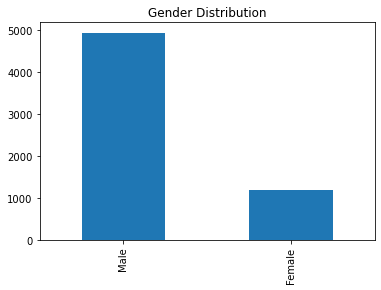

In [51]:
df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')

<AxesSubplot:>

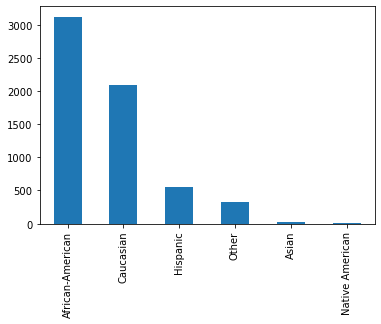

In [39]:
df['race'].value_counts().plot(kind='bar')

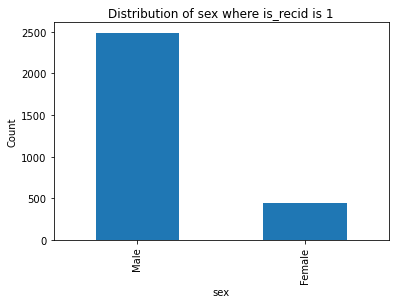

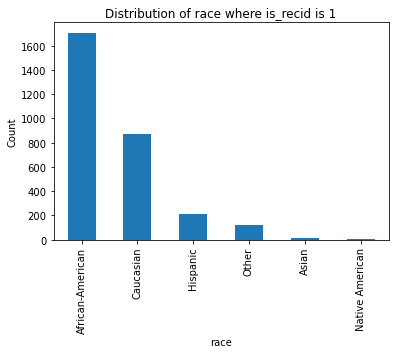

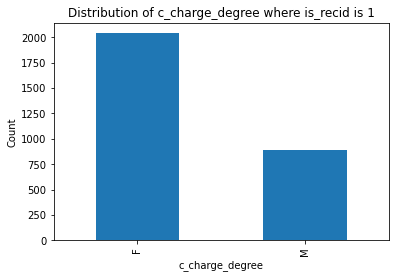

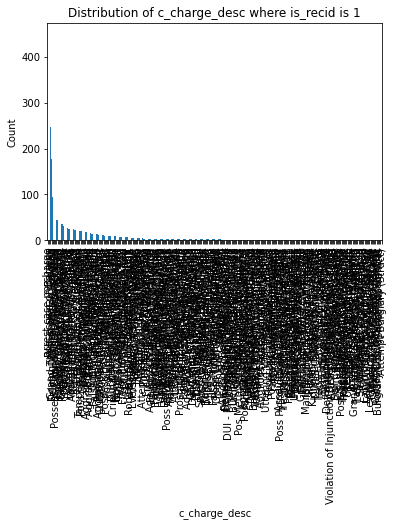

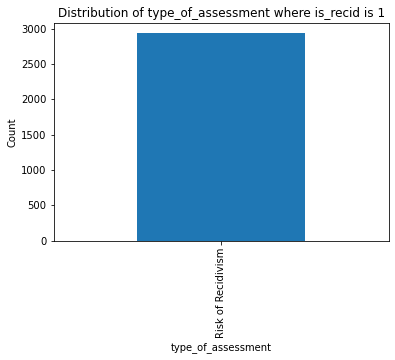

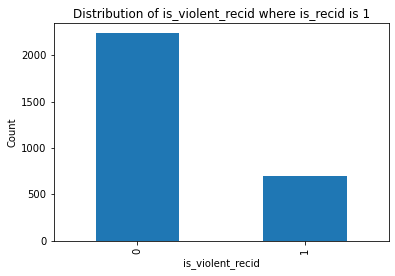

In [36]:
trues = df.loc[df['is_recid'] == 1]

categoricals = ['sex','race','c_charge_degree','c_charge_desc','type_of_assessment','is_violent_recid']

for col in categoricals:
    trues[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col} where is_recid is 1")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Text(0.5, 1.0, 'Distribution of top 20 Charges')

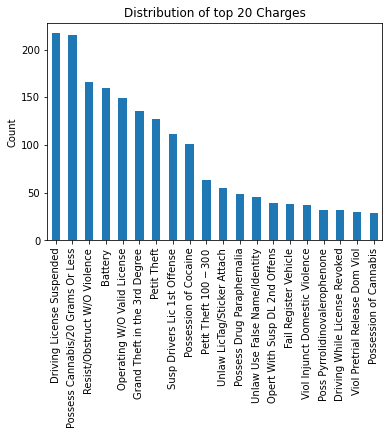

In [50]:
df['r_charge_desc'].value_counts().head(20).plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of top 20 Charges')

In [64]:
charge_by_race.head(29)

r_charge_desc
Driving License Suspended            217
Possess Cannabis/20 Grams Or Less    215
Resist/Obstruct W/O Violence         166
Battery                              160
Operating W/O Valid License          149
Grand Theft in the 3rd Degree        136
Petit Theft                          127
Susp Drivers Lic 1st Offense         112
Possession of Cocaine                101
Petit Theft $100- $300                63
Unlaw LicTag/Sticker Attach           55
Possess Drug Paraphernalia            49
Unlaw Use False Name/Identity         45
Opert With Susp DL 2nd Offens         39
Fail Register Vehicle                 38
Viol Injunct Domestic Violence        37
Poss Pyrrolidinovalerophenone         32
Driving While License Revoked         32
Viol Pretrial Release Dom Viol        30
Possession of Cannabis                29
Trespass Struct/Conveyance            27
Prowling/Loitering                    26
Grand Theft (Motor Vehicle)           24
Felony Petit Theft                    23
Tr

Text(0.5, 1.0, 'Top 20 Charge Description with highest recidivism')

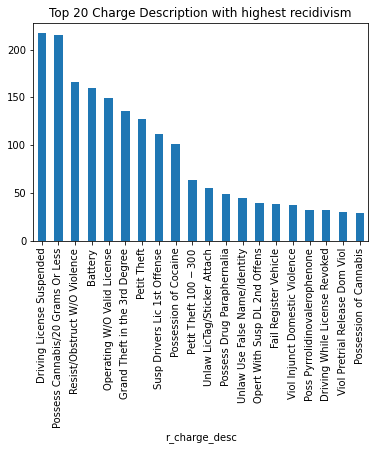

In [61]:
charge_by_race = df.groupby(['r_charge_desc']).count()['is_recid'].sort_values(ascending=False)
charge_by_race.head(20).plot(kind='bar')
plt.title('Top 20 Charge Description with highest recidivism')

In [9]:
print(df[['is_recid','is_violent_recid','two_year_recid']].groupby('is_recid').count())
df[['is_recid','is_violent_recid','two_year_recid']].corr()

          is_violent_recid  two_year_recid
is_recid                                  
0                     3183            3183
1                     2931            2931


,is_recid,is_violent_recid,two_year_recid
is_recid,1.000000,0.372898,0.942835
is_violent_recid,0.372898,1.000000,0.361307
two_year_recid,0.942835,0.361307,1.000000


<AxesSubplot:>

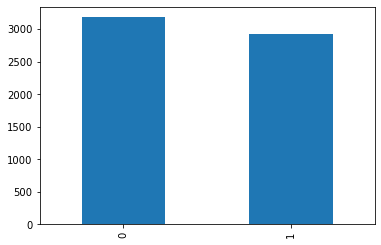

In [10]:
df['is_recid'].value_counts().plot(kind='bar')

In [11]:
cols = [
    "id"
    ,"name"
    ,"sex"
    ,"dob"
    ,"race"
    ,"juv_fel_count" 
    ,"juv_misd_count"
    ,"juv_other_count"
    ,"priors_count"
    ,"c_case_number"
    ,"c_charge_degree"
    ,"c_charge_desc"
    ,"c_offense_date"
    ,"c_arrest_date"
    ,"c_jail_in"
    ,"is_recid"
    ,"r_case_number"
    ,"r_charge_degree"
    ,"r_charge_desc"
    ,"r_offense_date"
    ,"is_violent_recid"
    ,"vr_case_number"
    ,"vr_offense_date"
    ,"vr_charge_degree"
    ,"vr_charge_desc"
]

df[cols].iloc[2].to_dict()

{'id': 3,
 'name': 'willie gray',
 'sex': 'Male',
 'dob': '1959-01-12',
 'race': 'African-American',
 'juv_fel_count': 0,
 'juv_misd_count': 0,
 'juv_other_count': 0,
 'priors_count': 8,
 'c_case_number': '14040148MU10A',
 'c_charge_degree': 'M',
 'c_charge_desc': 'DUI Level 0.15 Or Minor In Veh',
 'c_offense_date': '2014-10-30',
 'c_arrest_date': nan,
 'c_jail_in': '2014-10-31 12:02:01',
 'is_recid': 1,
 'r_case_number': '15043364TC20A',
 'r_charge_degree': '(M2)',
 'r_charge_desc': 'Driving License Suspended',
 'r_offense_date': '2015-07-23',
 'is_violent_recid': 0,
 'vr_case_number': nan,
 'vr_offense_date': nan,
 'vr_charge_degree': nan,
 'vr_charge_desc': nan}

In [12]:
df[cols]

,id,name,sex,dob,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_case_number,c_charge_degree,c_charge_desc,c_offense_date,c_arrest_date,c_jail_in,is_recid,r_case_number,r_charge_degree,r_charge_desc,r_offense_date,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc
0,1,steven lux,Male,1953-06-15,Caucasian,0,0,0,0,13000208CF10A,F,False Imprisonment,2013-01-05,NaN,2013-01-05 04:35:31,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2,andre small,Male,1987-10-01,African-American,0,0,0,1,13006354MM10A,M,Battery,2013-04-02,NaN,2013-04-02 12:18:46,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,3,willie gray,Male,1959-01-12,African-American,0,0,0,8,14040148MU10A,M,DUI Level 0.15 Or Minor In Veh,2014-10-30,NaN,2014-10-31 12:02:01,1,15043364TC20A,(M2),Driving License Suspended,2015-07-23,0,NaN,NaN,NaN,NaN
3,4,nickson marcellus,Male,1996-07-11,African-American,0,1,0,1,13017969CF10A,F,arrest case no charge,NaN,2014-01-23,2014-01-23 03:19:30,1,16000241MM20A,(M1),Possess Cannabis/20 Grams Or Less,2016-01-04,0,NaN,NaN,NaN,NaN
4,5,patria barnes,Female,1978-06-06,Other,0,0,0,0,13022717MM10A,M,Battery,2013-12-07,NaN,2013-12-08 01:55:28,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,African-American,0,0,0,1,13015644MM10A,M,Battery,2013-08-18,NaN,2013-08-18 07:25:24,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
6110,6111,mark montgomery,Male,1985-11-03,African-American,0,0,0,4,13005696MM10A,M,Possess Cannabis/20 Grams Or Less,2013-03-23,NaN,2013-03-23 01:32:34,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
6111,6112,erica johnson,Female,1982-06-23,Caucasian,0,0,0,0,13013661CF10A,F,Felony Driving While Lic Suspd,2013-09-29,NaN,2013-09-29 09:25:30,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
6112,6113,barry williams,Male,1988-04-22,African-American,0,0,0,3,13004112MM10A,M,arrest case no charge,NaN,2013-10-30,2013-10-30 03:40:14,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


### Curl

In [13]:
import requests

In [14]:
import json

# The payload dictionary
payload = {
    "id": "3",
    "name": "willie gray",
    "sex": "Male",
    "dob": "1959-01-12",
    "race": "African-American",
    "juv_fel_count": 0,
    "juv_misd_count": 0,
    "juv_other_count": 0,
    "priors_count": 8,
    "c_case_number": "14040148MU10A",
    "c_charge_degree": "M",
    "c_charge_desc": "DUI Level 0.15 Or Minor In Veh",
    "c_offense_date": "2014-10-30",
    "c_arrest_date": None,
    "c_jail_in": "2014-10-31 12:02:01",
    "is_recid": 1,
    "r_case_number": "15043364TC20A",
    "r_charge_degree": "(M2)",
    "r_charge_desc": "Driving License Suspended",
    "r_offense_date": "2015-07-23",
    "is_violent_recid": 0,
    "vr_case_number": None,
    "vr_offense_date": None,
    "vr_charge_degree": None,
    "vr_charge_desc": None
}

# Convert the payload dictionary to a JSON string
payload_json = json.dumps(payload, indent=2)

# Print the JSON string
print("Payload being sent:")
print(payload_json)

# Parse the JSON string back to a dictionary
obs_dict = json.loads(payload_json)

# Extract the ID and observation
_id = obs_dict['id']
observation = obs_dict

# Display the results
print(f"ID: {_id}")
print("Observation:", json.dumps(observation, indent=2))


Payload being sent:
{
  "id": "3",
  "name": "willie gray",
  "sex": "Male",
  "dob": "1959-01-12",
  "race": "African-American",
  "juv_fel_count": 0,
  "juv_misd_count": 0,
  "juv_other_count": 0,
  "priors_count": 8,
  "c_case_number": "14040148MU10A",
  "c_charge_degree": "M",
  "c_charge_desc": "DUI Level 0.15 Or Minor In Veh",
  "c_offense_date": "2014-10-30",
  "c_arrest_date": null,
  "c_jail_in": "2014-10-31 12:02:01",
  "is_recid": 1,
  "r_case_number": "15043364TC20A",
  "r_charge_degree": "(M2)",
  "r_charge_desc": "Driving License Suspended",
  "r_offense_date": "2015-07-23",
  "is_violent_recid": 0,
  "vr_case_number": null,
  "vr_offense_date": null,
  "vr_charge_degree": null,
  "vr_charge_desc": null
}
ID: 3
Observation: {
  "id": "3",
  "name": "willie gray",
  "sex": "Male",
  "dob": "1959-01-12",
  "race": "African-American",
  "juv_fel_count": 0,
  "juv_misd_count": 0,
  "juv_other_count": 0,
  "priors_count": 8,
  "c_case_number": "14040148MU10A",
  "c_charge_degr